#Sammanfattning
I det här projeketet kommer vi att ägna oss åt sentiment analys, i detta fall vill vi med hjälp av deep learning kunna ta reda på huruvida sentimentent i en filmrecenssion är positivt eller negativt. Detta gör vi genom att hämta färdig data med filmrecensioner från imdb. Denna data delas sedan upp i två delar träningsdata och testdata, där båda dessa delarna också innehåller facit för huruvida sentimentet för texten är positivt eller negativt. Därefter så skapar vi ett LSTM (en typ av RNN) för hantering och träning av datan, där vårt nätverk tar in datan enligt våra definitioner på dess storlek och sedan ger en numerär output som vi tolkar som antingen positiv eller negativ beroende på siffran. Slutligen så ritar vi också grafer på hur bra och träffsäkert vårat nätverk har blivit.

#Vad är RNN?
RNN är en typ av nätverk som lämpar sig väl för att behandla sekventiell data, där ny data kan vara beroende av tidigare data. T.ex för att förutsäga banan för en boll som kastats upp i luften så har vi stor användning av att veta var bollen kommer ifrån och dess tidigare riktning för att kunna avgöra vart bollen kommer att hamna härnäst. Att bara kunna hantera bollens nuvarande position gör det väldigt svårt för oss att göra förutsägelser. Detta är ett exempel på en typ av sekventiell data som RNN kan vara bra att använda på. En annan typ av data är text, som också ofta ska avläsas sekventiellt. Exempelvis om man vill slutföra meningar på text som saknar avslut så är information tidigare i meningen viktig för att veta hur meningen ska avslutas, för denna typ av problem används ofta LSTM(Long Short-Term Memory) som för det mesta är effektivare på den typen av längre sekvensiella beroenden. Då vi i detta projekt ska behandla just text så kommer vi därför att jobba med LSTM.

#Importerar bibliotek och tillägg

In [ ]:
import keras
keras.__version__
from keras.models import Sequential
from keras.layers import Embedding, LSTM
import numpy as np


Using TensorFlow backend.


#Importerar och förbereder datan
1. Hämtar vårt dataset.

2. Sparar datan.

3. Räknar ut genomsnittlängden samt medianen på datan för att sätta rimlig maximum length. Där efter skriver vi ut dessa värden. Sedan anger vi maxlen samt batch_size.

4. Här ger vi padding för att fylla ut sekvenser som är mindre än vår maxlen och förminskar de sekvenser som är längre än vår maxlen. Detta anger som 'post' för att se till att det sker i slutet av sekvenserna. Sedan skriver vi ut vår data för att se att den fått rätt storlek.

In [ ]:
#1.
from keras.datasets import imdb
from keras.preprocessing import sequence

#2.
max_features = 10000  # number of words to consider as features
print('Loading data...')
(input_train, output_train), (input_test, output_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

#3.
average_length = np.mean([len(x) for x in input_train])
median_length = sorted([len(x) for x in input_train])[len(input_train) // 2]
print('average text length:', average_length)
print('median text length:', median_length)

maxlen = 250  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

#4.
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen, padding='post', truncating="post")
input_test = sequence.pad_sequences(input_test, maxlen=maxlen, padding='post', truncating="post")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
average text length: 238.71364
median text length: 178
Pad sequences (samples x time)
input_train shape: (25000, 250)
input_test shape: (25000, 250)


#Skapar vår modell

Skapar en sekventiell modell och lägger till ett embedding-lager där två argument anges: storleken av vårt vokabulär(max_features) samt storleken på våra output-vektorer från detta lager. Därefter läggs ett LSTM-lager till, där enbart output-storleken defineras, resten lämnas till default-inställningarna. Slutligen så lägger vi också till vårt output-lager.

#Kompilerar och tränar
Här kompilerar vi först vår modell och anger optimiseringsmetod, loss-funktion samt vad vi är intresserade av att mäta. Därefter skapar vi träningen för modellen och anger antalet epoker som vi vill köra, storlek på vår batch samt valideringssplittring.

In [ ]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, output_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 44s 2ms/step - loss: 0.6929 - acc: 0.5136 - val_loss: 0.6761 - val_acc: 0.5666
Epoch 2/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6472 - acc: 0.6503 - val_loss: 0.5782 - val_acc: 0.7396
Epoch 3/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.5299 - acc: 0.7624 - val_loss: 0.4740 - val_acc: 0.8094
Epoch 4/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.4287 - acc: 0.8394 - val_loss: 0.4686 - val_acc: 0.7910
Epoch 5/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3637 - acc: 0.8706 - val_loss: 0.3633 - val_acc: 0.8568
Epoch 6/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.3158 - acc: 0.8919 - val_loss: 0.3551 - val_acc: 0.8558
Epoch 7/10
20000/20000

#Skriver ut resultaten
Här skriver vi ut resultaten.

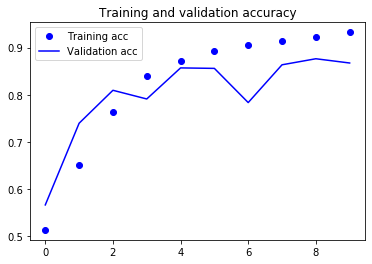

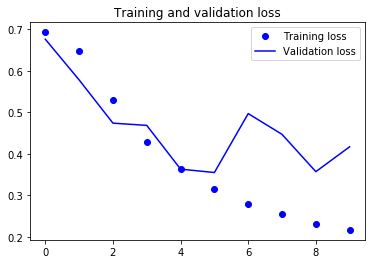

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()